## Homework


Use logistic regression to predict `above_average` which is 1 if the median_house_value is above its mean value and 0 otherwise.

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv



# 1 Data preparation
* Download the data, read it with pandas
* Look at the data
* Evaluate and handle null values
* Do feature engineering
* Perform one-hot-encoding to categorical variables


In [1]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

Check null values

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Fill N/A with 0

In [5]:
df['total_bedrooms']= df['total_bedrooms'].fillna(0)

Feature Engineering

In [6]:
df["rooms_per_household"] =df['total_rooms']/df['households']
df["bedrooms_per_room"] =df['total_bedrooms']/df['total_rooms']
df["population_per_household"] =df['population']/df['households']

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

In [7]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

<AxesSubplot:title={'center':'Feature Correlation'}>

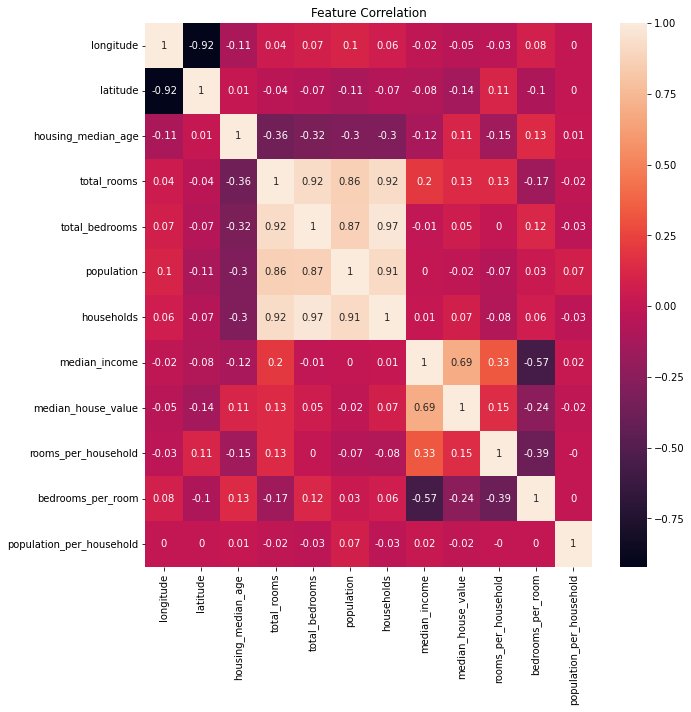

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,10))
plt.title('Feature Correlation')
sns.heatmap(df.corr().round(2), annot=True)

### One-hot encoding

* Encode categorical features


In [9]:
ocean_proximity_onehot = pd.get_dummies(df.ocean_proximity, prefix='ocean_proximity=')
df = pd.concat([df,ocean_proximity_onehot], axis=1)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity=_<1H OCEAN,ocean_proximity=_INLAND,ocean_proximity=_ISLAND,ocean_proximity=_NEAR BAY,ocean_proximity=_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0,0,0,1,0


total_bedrooms and households

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.



In [91]:
median_house_value_mean = df["median_house_value"].mean()
df["median_house_value"] =df["median_house_value"] >median_house_value_mean

In [92]:
df["median_house_value"].value_counts()

False    12255
True      8385
Name: median_house_value, dtype: int64

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [93]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [94]:
df_train.shape,df_test.shape, df_val.shape

((12384, 18), (4128, 18), (4128, 18))

In [95]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [96]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

In [97]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series,y_train)

mi = df_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

ocean_proximity    0.101384
dtype: float64

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [109]:
features = df_train.columns[df_train.dtypes != "object"]
features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'ocean_proximity=_<1H OCEAN', 'ocean_proximity=_INLAND',
       'ocean_proximity=_ISLAND', 'ocean_proximity=_NEAR BAY',
       'ocean_proximity=_NEAR OCEAN'],
      dtype='object')

In [110]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
X_train = df_train[features]
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [111]:
X_val = df_val[features]
global_score = model.score(X_val, y_val)
global_score

0.8364825581395349

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

total beedrooms is the less significant feature

In [122]:

results = []

for feature in features:
    X_train =df_train[features].drop(feature, axis=1)
    X_val =df_val[features].drop(feature, axis=1)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train.values, y_train)
    scx =model.score(X_val.values, y_val)
    difference = abs(round(scx-global_score,4))
    results.append({'feature_removed':feature,"difference":difference})

report = pd.DataFrame(results)
report.sort_values(by="difference",ascending=False)

,feature_removed,difference
7,median_income,0.0506
5,population,0.0102
2,housing_median_age,0.0056
6,households,0.0039
0,longitude,0.0034
1,latitude,0.0027
9,bedrooms_per_room,0.0010
13,ocean_proximity=_ISLAND,0.0010
14,ocean_proximity=_NEAR BAY,0.0010
11,ocean_proximity=_<1H OCEAN,0.0005


# Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [125]:
import numpy as np

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)


In [127]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X_val = df_val[features]
X_train = df_train[features]

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f'Alpha: {a}, RMSE: {round(np.sqrt(mean_squared_error(y_val, y_pred)),3):.3f}')

Alpha: 0, RMSE: 0.314
Alpha: 0.01, RMSE: 0.314
Alpha: 0.1, RMSE: 0.314
Alpha: 1, RMSE: 0.314
Alpha: 10, RMSE: 0.314
